In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import shutil
from os import listdir
from os.path import isfile, join
import time
import numpy as np
import matplotlib.ticker as mticker
from matplotlib.ticker import PercentFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.lines import Line2D
from scipy.stats import linregress
from datetime import timedelta
import scipy.stats as stats 
from scipy import signal

# colors obtained here
# https://davidmathlogic.com/colorblind/#%23000000-%23E69F00-%2356B4E9-%23009E73-%23F0E442-%230072B2-%23D55E00-%23CC79A7

In [2]:
df_bot_accounts = pd.read_csv('data/bots.csv')
all_phrases = ['2 days','3 days','4 days','5 days','7 days','10 days',
               '2 weeks','3 weeks','4 weeks','6 weeks',
              '2 months','3 months','4 months','5 months','6 months','12 months',
              '2 years','3 years','4 years','5 years','10 years','20 years','30 years']

# Read all of the filenames
all_sents = [f for f in listdir('data/VADER/') if isfile(join('data/VADER/', f))]
all_sents = ["data/VADER/"+f for f in all_sents if f[len(f)-4:]== ".csv"]


var = 'vader'
df = pd.read_csv(all_sents[0])
df['phrase'] = all_sents[0][11:all_sents[0].index('_')]
df = df[['tweet_id','created_at','phrase',var]]

for i in all_sents[1:]:
    df_1 = pd.read_csv(i)
    df_1['phrase'] = i[11:i.index('_')]

    df_1 = df_1[['tweet_id','created_at','phrase',var]]
    df = pd.concat([df,df_1])

df = df.loc[df.vader!=0]
df.created_at = pd.to_datetime(df['created_at'])
df = df.dropna(subset=[var])
df = df.loc[~df.tweet_id.isin(list(df_bot_accounts.tweet_id))]


/Users/calvinisch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


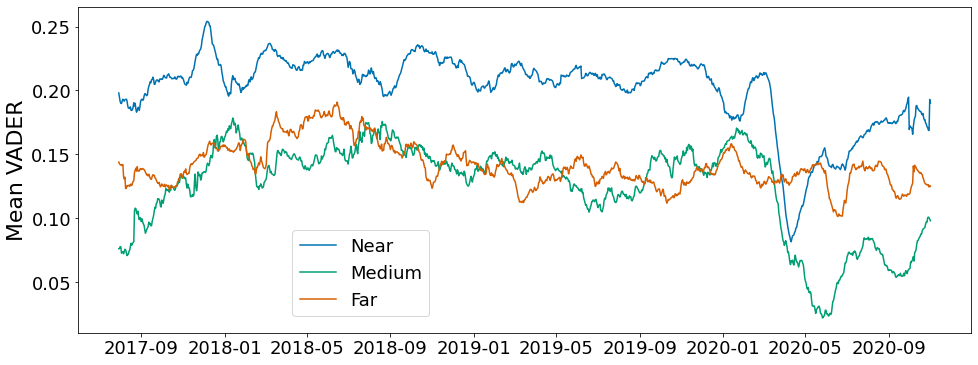

In [3]:
p_d = ['2-days','3-days','4-days','5-days','7-days','10-days','2-weeks','3-weeks','4-weeks']
p_w = ['6-weeks','2-months','3-months','4-months','5-months','6-months']
p_m = ['12-months','2-years','3-years','4-years','5-years','10-years','20-years','30-years']
a = ['Near','Medium','Far']
ps = [p_d,p_w,p_m]
df_counts = pd.DataFrame({'created_at':[],'vader':[],'phrase':[]})
for p in range(len(ps)):
    df_temp = df.loc[df.phrase.isin(ps[p])]
    df_temp = df_temp[['created_at','vader']].resample('d', on='created_at').mean().dropna(how='all')
    df_temp.Sentiment = (df_temp['vader'] - df_temp['vader'].mean())/df_temp['vader'].std(ddof=0)
    df_temp['phrase'] = a[p]
    df_temp['created_at'] = df_temp.index
    df_temp = df_temp.reset_index(drop=True)
    df_counts = pd.concat([df_counts,df_temp],sort=False)
    
fig, axs = plt.subplots(1, 1,figsize=(16,6))
df_2 = df_counts.loc[df_counts.phrase == 'Near'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Near',color = '#0072B2')

df_2 = df_counts.loc[df_counts.phrase == 'Medium'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Medium',color = '#009E73')

df_2 = df_counts.loc[df_counts.phrase == 'Far'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Far', color = '#D55E00')


axs.set_ylabel('Mean VADER',fontsize=22)
axs.legend(fontsize=18, loc=(.24,.05))

axs.tick_params(labelsize=18)
#plt.savefig('SI-plots/Mean-Vader-near-med-far.png',dpi=400)
plt.show()

2323346
2225598


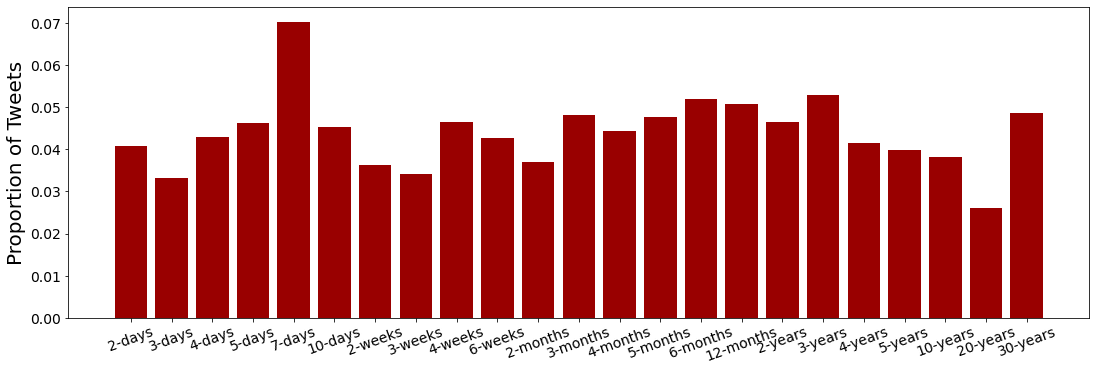

In [5]:
# Read all of the filenames
df = pd.read_csv(all_sents[0])
df['phrase'] = all_sents[0][11:all_sents[0].index('_')]
df = df[['tweet_id','created_at','phrase',var]]

for i in all_sents[1:]:
    df_1 = pd.read_csv(i)
    df_1['phrase'] = i[11:i.index('_')]

    df_1 = df_1[['tweet_id','created_at','phrase',var]]
    df = pd.concat([df,df_1])

df = df.loc[df.vader!=0]
df.created_at = pd.to_datetime(df['created_at'])
df = df.dropna(subset=[var])
print(df.tweet_id.count())
df = df.loc[~df.tweet_id.isin(list(df_bot_accounts.tweet_id))]
print(df.tweet_id.count())

dif_counts = []
dif_counts_props = []
all_phrases = ['2-days','3-days','4-days','5-days','7-days','10-days',
               '2-weeks','3-weeks','4-weeks','6-weeks',
              '2-months','3-months','4-months','5-months','6-months','12-months',
              '2-years','3-years','4-years','5-years','10-years','20-years','30-years']
for p in all_phrases:
    all_tweets = df_bots.loc[df_bots['phrase'] == p].vader.count()
    bots_removed = df.loc[df['phrase'] == p].vader.count()
    
    dif_counts.append(all_tweets - bots_removed)
    dif_counts_props.append((all_tweets - bots_removed) / all_tweets)
    

bars = ('2 days','3 days','4 days','5 days','7 days','10 days',
               '2 weeks','3 weeks','4 weeks','6 weeks',
              '2 months','3 months','4 months','5 months','6 months','12 months',
              '2 years','3 years','4 years','5 years','10 years','20 years','30 years')
y_pos = np.arange(len(bars))
fig, axs = plt.subplots(1, 1,figsize=(16,6))
fig.tight_layout(pad=5)


axs.bar(y_pos, dif_counts_props,color = "#990000")
axs.set_xticks(y_pos)
axs.set_xticklabels(all_phrases, rotation= 20) 
axs.tick_params(labelsize=14)
axs.set_ylabel('Proportion of Tweets',fontsize=20)
#axs.set_title("Proportion of Bot-tweets per Phrase",fontsize = 24)

plt.savefig('SI-plots/bot-tweets-per-phrase.png',dpi=400)
plt.show()


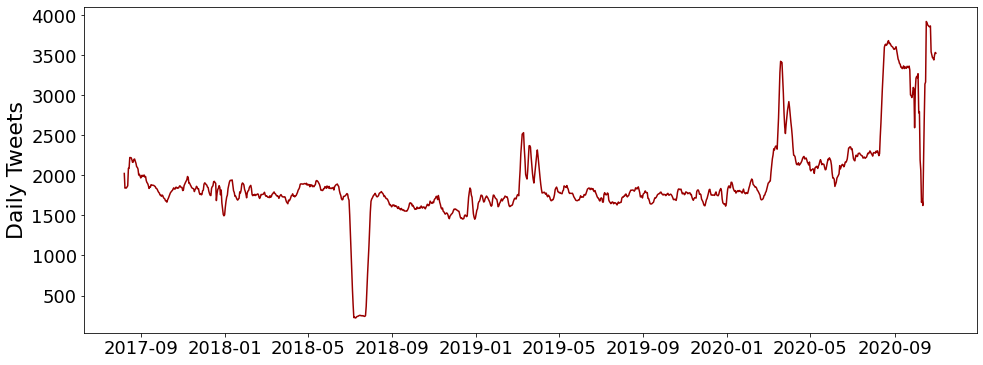

In [8]:
# Helper function to get the counts of all dates
def get_counts():
    df_counts = pd.DataFrame({'created_at':[],'count':[]})

    # For each file
    for f in all_sents:

        # Read in a file
        df_temp = pd.read_csv(f)

        # Remove 0 sentiment:
        df_temp = df_temp.loc[df_temp['vader'] != 0]
        
        # Drop duplicates if they exist
        df_temp = df_temp.drop_duplicates()

        # Change to date-time and group by date
        s = pd.to_datetime(df_temp['created_at'])
        df_temp = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
        
        df_counts = pd.concat([df_counts,df_temp])
    
    return df_counts

df_counts = get_counts()

df_2 = df_counts.groupby('created_at', as_index = False)['count'].sum()
df_2 = df_2.loc[df_2.created_at >= '2017-08-01']
fig, axs = plt.subplots(1, 1,figsize=(16,6))
df_2['MA'] = df_2.rolling(window=7).mean()
axs.set_ylabel('Daily Tweets',fontsize=22)
#axs.set_title("Tweets over time",fontsize=24)
axs.plot(df_2['created_at'],df_2['MA'], color = '#990000')
#axs.set_xticks(rotation=20)
axs.tick_params(labelsize=18)
plt.savefig("SI-plots/Tweets_over_time_(MA)",dpi=400)
plt.show()

In [13]:
# Plot them all months individually
# Helper function to get log x values
def get_x():
    x_1 = [2,3,4,5,7,10,14,21,28,42,60,90,120,150,180,365,730,3*365,4*365,5*365,10*365,20*365,30*365]
    x = [np.log10(n) for n in x_1]  
    return(x)

# Helper function to load a specific month
def get_range(t_1,t_2):
    
    df_range = df.copy()

    # Select only tweets in these dates
    mask = (pd.Timestamp(t_1+' 00:00:00+0000') <= df_range['created_at']) & (df_range['created_at'] < pd.Timestamp(t_2+' 00:00:00+0000'))
    df_range = df_range.loc[mask]

    return df_range

# Helper function for confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return h

 
-0.02896 x + 0.2319
 
-0.01418 x + 0.1497


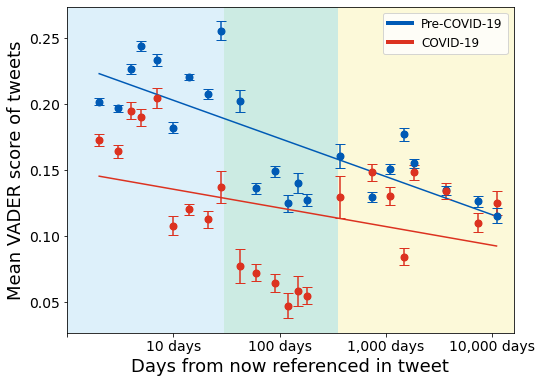

In [17]:
# responding comment

# Plot March 2019 and 2020
fig, axs = plt.subplots(1, 1,figsize=(8,6))

# Get all phrases and x locations in log of days
x = get_x()

all_phrases = ['2-days','3-days','4-days','5-days','7-days','10-days',
               '2-weeks','3-weeks','4-weeks','6-weeks',
              '2-months','3-months','4-months','5-months','6-months','12-months',
              '2-years','3-years','4-years','5-years','10-years','20-years','30-years']

# Plot 2019
df_main = get_range("2017-08-01", "2020-03-11") # 2018-03
all_tweets = [df_main.loc[df_main['phrase'] == phrase][var].mean() for phrase in all_phrases]
all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase][var]) for phrase in all_phrases]
coef = np.polyfit(x,all_tweets,1)
poly1d_fn = np.poly1d(coef) 
print(poly1d_fn)
axs.errorbar(x, all_tweets, all_e, linestyle='None', marker='o', ecolor="#005AB5", mec="#005AB5", mfc="#005AB5", mew=1, ms=7, capsize=5)
axs.plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color="#005AB5")


# Plot 2020
df_main = get_range("2020-03-11", "2020-10-31") #2020 - 03-11
all_tweets = [df_main.loc[df_main['phrase'] == phrase][var].mean() for phrase in all_phrases]
all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase][var]) for phrase in all_phrases]
coef = np.polyfit(x,all_tweets,1)
poly1d_fn = np.poly1d(coef) 
print(poly1d_fn)
axs.errorbar(x, all_tweets, all_e, linestyle='None', marker='o', ecolor="#DC3220", mec="#DC3220", mfc="#DC3220", mew=1, ms=7, capsize=5)
axs.plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color="#DC3220")

axs.axvspan(0, np.log10(30), facecolor='#56B4E9', alpha=0.2)
axs.axvspan(np.log10(30), np.log10(350), facecolor='#009E73', alpha=0.2)
axs.axvspan(np.log10(350), 4.2, facecolor='#F0E442', alpha=0.2)
axs.set_xlim(0,4.2)

# Labels
#plt.title("Sentiment Curve", fontsize = 24)
plt.ylabel('Mean VADER score of tweets', fontsize = 18)
plt.xlabel("Days from now referenced in tweet", fontsize = 18)

custom_lines = [Line2D([0], [0], color='#005AB5',  lw=4),
                Line2D([0], [0], color='#DC3220', lw=4)]

axs.legend(custom_lines,["Pre-COVID-19","COVID-19"],fontsize = 12)

#plt.legend(["(Typical)","March 2018","(Inverted)","March 2020"], loc='best', fontsize = 14)
plt.xticks(np.arange(5), ('','10 days', '100 days','1,000 days','10,000 days'))

axs.tick_params(labelsize=14)
plt.savefig('SI-plots/Sentiment-Yield-Curve-Typical-Inverted-all.png',dpi=400)
plt.show()

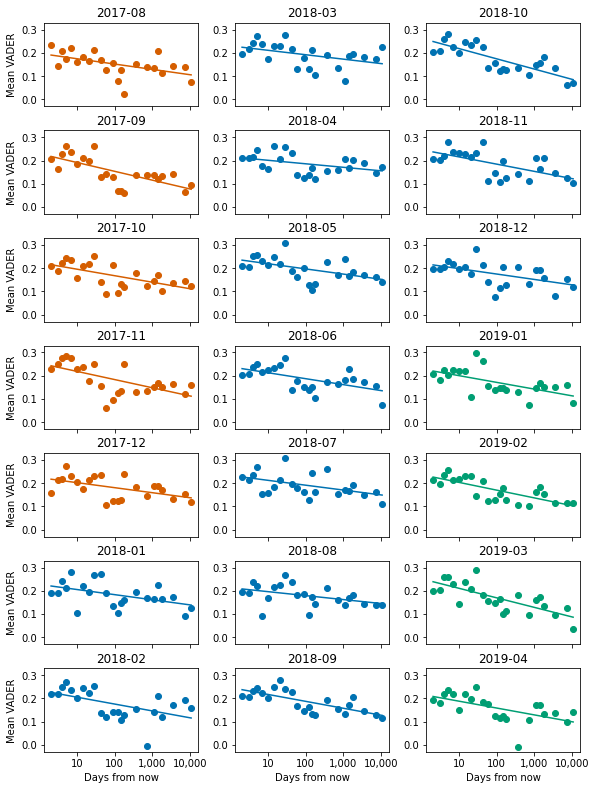

In [18]:


all_months = []
for m in ['08','09','10','11','12']:
    all_months.append('2017-'+m+"-01")
for y in ['2018','2019']:
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        all_months.append(y+'-'+m+"-01")
for m in ['01','02','03','04']:
    all_months.append('2019-'+m+"-01")

# Get their positions in the figure
fig_row = []
fig_col = []
for j in [0,1,2]:
    for i in [0,1,2,3,4,5,6]:
        fig_col.append(j)
        fig_row.append(i)

# Get some seperate colors
cols = ['#D55E00','#D55E00','#D55E00','#D55E00','#D55E00']
for col in ['#0072B2','#009E73']:
    for i in range(12):
        cols.append(col)
        
# Create a figure with the appropriate amount of slots
fig, axs = plt.subplots(7, 3,figsize=(8,10.5)) # 9 by 12 before
#fig.suptitle("Yield curve over time",size = 16)
fig.tight_layout(pad=0.3)
#for ax in axs.flat:
#    ax.set_xticks([])

# Get the X axis in log scale
x = get_x()

# For all of those months
for i in range(21):
    # Get the appropriate month
    df_main = get_range(all_months[i], all_months[i + 1])
    
    # Find the mean and error bars
    all_tweets = [df_main.loc[df_main['phrase'] == phrase].vader.mean() for phrase in all_phrases]
    all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase].vader) for phrase in all_phrases]

    # Find the best fit 4th degree polynomial
    coef = np.polyfit(x,all_tweets,1)
    poly1d_fn = np.poly1d(coef) 
    axs[fig_row[i], fig_col[i]].set_xticklabels(('','','','',''))
    if fig_col[i] == 0:
        axs[fig_row[i], fig_col[i]].set_ylabel("Mean VADER")
    if fig_row[i] == 6:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))

    # Plot this
    #axs[fig_row[i], fig_col[i]].errorbar(x, all_tweets, all_e, linestyle='None', marker='o', ecolor="black", mec="black", mfc="black", mew=1, ms=7, capsize=5)
    axs[fig_row[i], fig_col[i]].plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color=cols[i])
    axs[fig_row[i], fig_col[i]].set_title(all_months[i][:len(all_months[i])-3])
    axs[fig_row[i], fig_col[i]].set_ylim([-.03,0.33])
plt.savefig('SI-plots/All_Months-1.png', dpi = 400,bbox_inches='tight')

plt.show()

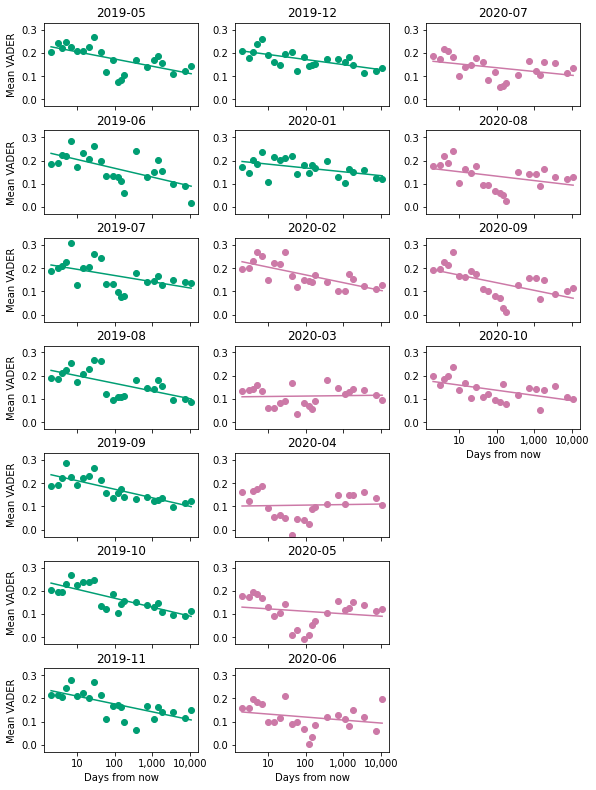

In [19]:
all_months = []
for m in ['05','06','07','08','09','10','11','12']:
    all_months.append('2019-'+m+"-01")
for m in ['01','02','03','04','05','06','07','08','09','10','11']:
    all_months.append('2020-'+m+"-01")

# Get their positions in the figure
fig_row = []
fig_col = []
for j in [0,1,2]:
    for i in [0,1,2,3,4,5,6]:
        fig_col.append(j)
        fig_row.append(i)

# Get some seperate colors
cols = ['#009E73','#009E73','#009E73','#009E73','#009E73','#009E73','#009E73','#009E73','#009E73']
for col in ['#CC79A7']:
    for i in range(10):
        cols.append(col)
        
# Create a figure with the appropriate amount of slots
fig, axs = plt.subplots(7, 3,figsize=(8,10.5))
#fig.suptitle("Yield curve over time",size = 16)
fig.tight_layout(pad=0.3)
#for ax in axs.flat:
#    ax.set_xticks([])

# Get the X axis in log scale
x = get_x()

# For all of those months
for i in range(len(all_months)-1):
    # Get the appropriate month
    df_main = get_range(all_months[i], all_months[i + 1])
    
    # Find the mean and error bars
    all_tweets = [df_main.loc[df_main['phrase'] == phrase].vader.mean() for phrase in all_phrases]
    all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase].vader) for phrase in all_phrases]

    # Find the best fit 4th degree polynomial
    coef = np.polyfit(x,all_tweets,1)
    poly1d_fn = np.poly1d(coef) 
    axs[fig_row[i], fig_col[i]].set_xticklabels(('','','','',''))
    if fig_col[i] == 0:
        axs[fig_row[i], fig_col[i]].set_ylabel("Mean VADER")
    if fig_row[i] == 6:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))
    if fig_col[i] == 2 and fig_row[i] == 3:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))
    # Plot this
    #axs[fig_row[i], fig_col[i]].errorbar(x, all_tweets, all_e, linestyle='None', marker='o', ecolor="black", mec="black", mfc="black", mew=1, ms=7, capsize=5)
    axs[fig_row[i], fig_col[i]].plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color=cols[i])
    axs[fig_row[i], fig_col[i]].set_title(all_months[i][:len(all_months[i])-3])
    axs[fig_row[i], fig_col[i]].set_ylim([-.03,0.33])
axs[4, 2].axis('off')
axs[5, 2].axis('off')
axs[6, 2].axis('off')
plt.savefig('SI-plots/All_Months-2.png', dpi = 400,bbox_inches='tight')

plt.show()

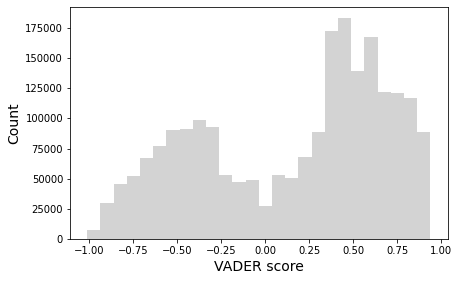

In [20]:
fig, axs = plt.subplots(1, 1,figsize=(6,4))
#fig.suptitle("Distribution of Average Vader Scores by Phrase",size = 16)
fig.tight_layout(pad=2.5)
plt.gcf().subplots_adjust(left=.05, top = .95)
    
#axs.set_title('VADER Distribution',fontsize = 18)
axs.hist(df.vader, bins=np.arange(-1.0125, 1.0125, 0.075),color = '#d3d3d3')
axs.set_ylabel("Count", fontsize = 14)
axs.set_xlabel("VADER score", fontsize = 14)
plt.savefig('SI-plots/hist-vader.png',dpi=400,bbox_inches='tight')
plt.show()